In [11]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


We are using a variety of transformers that are available in sklearn. They all have similar structures 
and implement a fit_transform() method. These transformers allow us to perform a variety of data 
preprocessing steps on our data

#### Standardizing Data

For each data value, x, we subtract the overall mean of the data, μ, then divide by the overall standard deviation, 
σ. The new value, z, represents the standardized data value.

In [3]:
# standardizing data
pizza_data = np.array([[2100,   10,  800],
                       [2500,   11,  850],
                       [1800,   10,  760],
                       [2000,   12,  800],
                       [2300,   11,  810]])


# Newline to separate print statements
print('{}\n'.format(repr(pizza_data)))

# Standardizing each column of pizza_data
col_standardized = scale(pizza_data)
print('{}\n'.format(repr(col_standardized)))

# Column means (rounded to nearest thousandth)
col_means = col_standardized.mean(axis=0).round(decimals=3)
print('{}\n'.format(repr(col_means)))

# Column standard deviations
col_stds = col_standardized.std(axis=0)
print('{}\n'.format(repr(col_stds)))


# we normally do separate standardizations for each column (so that each column is a standardized version of itself)

array([[2100,   10,  800],
       [2500,   11,  850],
       [1800,   10,  760],
       [2000,   12,  800],
       [2300,   11,  810]])

array([[-0.16552118, -1.06904497, -0.1393466 ],
       [ 1.4896906 ,  0.26726124,  1.60248593],
       [-1.40693001, -1.06904497, -1.53281263],
       [-0.57932412,  1.60356745, -0.1393466 ],
       [ 0.66208471,  0.26726124,  0.2090199 ]])

array([ 0., -0.,  0.])

array([1., 1., 1.])



We can also compress data to a particular range of values (e.g., make every data point be from [0, 1] or some other custom range). 

The formula for scaling based on a range is a two-step process. For a given data value, x, we first compute the proportion of the value with respect to the min and max of the data dmin and dmax, respectively).

$x_{prop} = \frac{x - min}{max - min}$ 

Now x takes values from 0 (if x = min) to 1 (if x = max)

Now, we then apply this [0, 1] scale to any range that we'd like, using the following procedure:

$x_{scale} = x_{prop} * (max - min) + min$

Sklearn provides a variety of $transformers$, modules that allow us to transform the data
The MinMaxScaler() performs the range compression that we did above. By default, it compresses the data to [0, 1]. 

We can instantiate a MinMaxScaler() object, then use its fit, transform, or fit_transform() methods on our data
in order to return a scaled version of our data

In [10]:
data = np.array([[ 1.2,  3.2],
                 [-0.3, -1.2],
                 [ 6.5, 10.1],
                 [ 2.2, -8.4]])

print(data)
print("\n\n")

# using default params
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

print(scaled_data)
print("\n\n")

# using new range
custom_scaler = MinMaxScaler(feature_range = (-2, 3))
custom_scaled_data = custom_scaler.fit_transform(data)
print(custom_scaled_data)

# we can also take the fit and transform functions separately. 
# the fit function operates on the MinMaxScaler object and allows it to take in a data object (presumably
# now as an attribute, say, scaler.data, of the object?) and transform performs the actual transformation

new_scaler = MinMaxScaler()
new_scaler.fit(data) # input data
print("This is the range of observations from the scaled data: {}".format(new_scaler.data_range_))
print("This shows that when you fit the data, the MinMaxScaler object takes in the data")
new_data_fit = new_scaler.transform(data) # seems like you still need to input the dataset
print(new_data_fit)

[[ 1.2  3.2]
 [-0.3 -1.2]
 [ 6.5 10.1]
 [ 2.2 -8.4]]



[[0.22058824 0.62702703]
 [0.         0.38918919]
 [1.         1.        ]
 [0.36764706 0.        ]]



[[-0.89705882  1.13513514]
 [-2.         -0.05405405]
 [ 3.          3.        ]
 [-0.16176471 -2.        ]]
This is the range of observations from the scaled data: [ 6.8 18.5]
This shows that when you fit the data, the MinMaxScaler object takes in the data
[[0.22058824 0.62702703]
 [0.         0.38918919]
 [1.         1.        ]
 [0.36764706 0.        ]]


But, when we scale, it's also important to not be affected by outliers. To do so, we can use sklearn's RobustScaler(), rather than the MinMaxScaler()

Previously, we used a dataset's minimum and maximum values to scale. However, if there are outliers, these values skew our dataset. 

We can robustly scale the data, i.e. avoid being affected by outliers, by using use the data's median and Interquartile Range (IQR). Since the median and IQR are percentile measurements of the data (50% for median, 25% to 75% for the IQR), they are not affected by outliers. For the scaling method, we just subtract the median from each data value then scale to the IQR.

In [12]:
# using RobustScaler()
# the fit method doesn't store the data. Rather, it keeps the median and quartiles that will then be used during
# the transformation

print(data)
print("\n")
robust_scaler = RobustScaler()
transformed = robust_scaler.fit_transform(data)
print(transformed)

[[ 1.2  3.2]
 [-0.3 -1.2]
 [ 6.5 10.1]
 [ 2.2 -8.4]]


[[-0.20408163  0.27760252]
 [-0.81632653 -0.27760252]
 [ 1.95918367  1.14826498]
 [ 0.20408163 -1.18611987]]


Each of the scaling features above were done for individual columns. 

But, what if we instead wanted to standardize the values of a row? This is helpful, for example, in cases where we need all the entries in a row to add up to 1?

To do so, we can normalize our data. 

One normalization method is L2 normalization, in which we divide each row's observations by the L2 norm of that row. 

Remember, a norm $L_p$ is defined as:

$||X||_p = (\sum\limits_{i = 1}^{N} |X_i|^p)^{1/p}$

In sklearn, the L2 normalization is implemented by the Normalizer

In [13]:
from sklearn.preprocessing import Normalizer

print(data)
print("\n")

normalizer = Normalizer()
transformed = normalizer.fit_transform(data)
print('{}\n'.format(repr(transformed)))

[[ 1.2  3.2]
 [-0.3 -1.2]
 [ 6.5 10.1]
 [ 2.2 -8.4]]


array([[ 0.35112344,  0.93632918],
       [-0.24253563, -0.9701425 ],
       [ 0.54117832,  0.84090786],
       [ 0.25335939, -0.96737222]])



We also will have cases where we're missing data. How do we impute missing data?

In sklearn, the SimpleImputer() transformer provides 4 common imputation methods: using the mean value, using the median value, using the most common value, and using a constant value. 

In [18]:
from sklearn.impute import SimpleImputer

data_missing = np.array([[ 1.,  2., np.nan,  2.],
                         [ 5., np.nan,  1.,  2.],
                         [ 4., np.nan,  3., np.nan],
                         [ 5.,  6.,  8.,  1.],
                         [np.nan,  7., np.nan,  0.]])

print(data_missing)
print("\n")

impute_mean = SimpleImputer(strategy = 'mean')
imputed_data = impute_mean.fit_transform(data_missing)
print(imputed_data)
print("\n")

impute_median = SimpleImputer(strategy = 'median')
imputed_median_data = impute_median.fit_transform(data_missing)
print(imputed_median_data)
print("\n")

[[ 1.  2. nan  2.]
 [ 5. nan  1.  2.]
 [ 4. nan  3. nan]
 [ 5.  6.  8.  1.]
 [nan  7. nan  0.]]


[[1.   2.   4.   2.  ]
 [5.   5.   1.   2.  ]
 [4.   5.   3.   1.25]
 [5.   6.   8.   1.  ]
 [3.75 7.   4.   0.  ]]


[[1.  2.  3.  2. ]
 [5.  6.  1.  2. ]
 [4.  6.  3.  1.5]
 [5.  6.  8.  1. ]
 [4.5 7.  3.  0. ]]




As a part of our data preprocessing steps, we can also perform dimensionality reduction and reduce the number of columns in our dataset. One approach to doing this is by performing PCA. 

PCA extracts the principal components of the dataset, which are an uncorrelated set of latent variables that encompass most of the information from the original dataset. Using a smaller set of principal components can make it a lot easier to use the dataset in statistical or machine learning models (especially when the original dataset contains many correlated features).

Like any other data transformation method, there is a PCA() transformer in sklearn. When we initialize the PCA() object, we can include an "n_components" keyword (default = m - 1, where m = # of features) that determines how many principal components will be a part of our analysis. 

In [24]:
# perform PCA on a new set of data
new_data = np.array([[ 1.5,  3. ,  9. , -0.5,  1. ],
                     [ 2.2,  4.3,  3.5,  0.6,  2.7],
                     [ 3. ,  6.1,  1.1,  1.2,  4.2],
                     [ 8. , 16. ,  7.7, -1. ,  7.1]])

from sklearn.decomposition import PCA

pca_obj = PCA() # The value of n_component will be 4. As m is 5 and default is always m-1
pc = pca_obj.fit_transform(new_data).round(3) # keeps 4 columns, projects data along these 4 principal components
print('{}\n'.format(repr(pc)))

pca_obj = PCA(n_components=3)
pc = pca_obj.fit_transform(new_data).round(3) # keeps 3 columns, projects data along these three columns
print('{}\n'.format(repr(pc)))

pca_obj = PCA(n_components=2)
pc = pca_obj.fit_transform(new_data).round(3) # keeps 2 columns, projects data along these two columns
print('{}\n'.format(repr(pc)))

#NOTE: each row(observation) has only 2, 3, or 4 values, in contrast to 5 from before. These
# values are its projections onto the principal components (e.g., entry [0, 0] is the first observation's 
# projection onto the first axis, or the first principal component, while entry [0, 2] is the first observation's
# projection onto the third axis, or the third principal component).

array([[-4.8600e+00,  4.6300e+00, -4.7000e-02,  0.0000e+00],
       [-3.7990e+00, -1.3180e+00,  1.2700e-01,  0.0000e+00],
       [-1.8630e+00, -4.2260e+00, -8.9000e-02,  0.0000e+00],
       [ 1.0522e+01,  9.1400e-01,  9.0000e-03,  0.0000e+00]])

array([[-4.8600e+00,  4.6300e+00, -4.7000e-02],
       [-3.7990e+00, -1.3180e+00,  1.2700e-01],
       [-1.8630e+00, -4.2260e+00, -8.9000e-02],
       [ 1.0522e+01,  9.1400e-01,  9.0000e-03]])

array([[-4.86 ,  4.63 ],
       [-3.799, -1.318],
       [-1.863, -4.226],
       [10.522,  0.914]])



Now, let's look at an example of separating data by class:

In this example, we are looking at tumors (malignant vs. benign). We can project the data along two principal components, get our transformed data after we project it ontho these two components, then graph them. Given the nature of this particular data, we will see that the data likely clusters nicely around the principal component, since we do see natural clustering

In [25]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
print('{}\n'.format(repr(bc.data)))
print('Data shape: {}\n'.format(bc.data.shape))

# Class labels
print('{}\n'.format(repr(bc.target)))
print('Labels shape: {}\n'.format(bc.target.shape))

# Label names
print('{}\n'.format(list(bc.target_names)))

malignant = bc.data[bc.target == 0]
print('Malignant shape: {}\n'.format(malignant.shape))

benign = bc.data[bc.target == 1]
print('Benign shape: {}\n'.format(benign.shape))

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Data shape: (569, 30)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 

In [26]:
def get_label_info(component_data, labels,class_label, label_names):
    """
        Extracts the label from the observation. In this case, used on data that's
        already been projected onto the principal component
    """
    label_name = label_names[class_label]
    label_data = component_data[labels == class_label]
    return (label_name, label_data)

In [27]:
def separate_data(component_data, labels,label_names):
    separated_data = []
    for class_label in range(len(label_names)):
        separated_data.append(get_label_info(
            component_data, labels, class_label, label_names))
    return separated_data

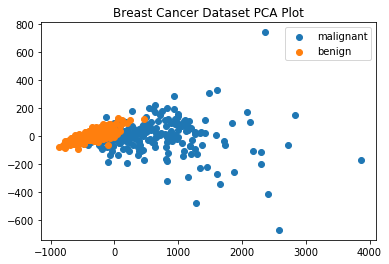

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
bc = load_breast_cancer()
pca_obj = PCA(n_components=2)
component_data = pca_obj.fit_transform(bc.data)
labels = bc.target
label_names = bc.target_names
# Using the completed separate_data function
separated_data = separate_data(component_data,
                               labels, label_names)

# Plotting the data
import matplotlib.pyplot as plt
for label_name, label_data in separated_data:
    col1 = label_data[:, 0]  # 1st column (1st pr. comp.)
    col2 = label_data[:, 1]  # 2nd column (2nd pr. comp.)
    plt.scatter(col1, col2, label=label_name) # scatterplot
plt.legend()  # adds legend to plot
plt.title('Breast Cancer Dataset PCA Plot')
plt.show()